In [3]:
import sys

# go out by one level of directory
sys.path.append("..")

# Introduction

## Problem Statement

# Machine Learning Pipeline

## Step 1: Exploratory Data Analysis

Understanding the dataset plays a crucial part in a Machine Learning project, since it will provide a thorough look on what tends to happen with the dataset, as well as its characteristics. From there, the appropriate preprocessing and training methods can be used for training processes, optimizing the outcome of the model.

In this project, we are handling a dataset of images relating to furniture categories (task 1 and 2), as well as their styles (task 3), which will then be processed and trained. The common outcome is to provide the highest-accuracy label for the images, in addition to suggesting the closest-similarity images for the predicted one.

First, we will look at the dataset to observe its characteristics. Some of them are dataset capacity, file extensions, and count for each of the category

### Project Setup

Before starting the EDA, we need to configure the project by defining the necessary constants and importing the required libraries.

#### File and Directory Paths

The following constants define the file and directory paths used in the project.

In [4]:
# Set global directories
DATA_DIR = "../data"
DATASET_DIR = f"{DATA_DIR}/datasets"

CACHE_DIR = f"{DATA_DIR}/cache"
DATASET_CACHE_DIR = f"{CACHE_DIR}/datasets"

DATASET_DIR = f"{DATASET_DIR}/raw"
CLEANED_DATASET_DIR = f"{DATASET_DIR}/cleaned"
PROCESSED_DATASET_DIR = f"{DATASET_DIR}/processed"

# Set path to cache visualizations and models
VISUALIZATION_DIR = f"{CACHE_DIR}/visualizations"
MODEL_DIR = f"{CACHE_DIR}/models"

#### Reload custom libraries

Some libraries purposely custom-built by me to be used in this notebook. Making modifications to these libraries will require reloading them. The following code block automates the process of reloading the libraries without restarting the kernel.

In [5]:
from utils.cache import reload_custom_libraries

reload_custom_libraries()

# Import necessary packages and libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from PIL import ImageFile
import os, sys
from tqdm.notebook import tqdm
from utils.image_process import get_category_image_paths, get_image_sizes
# Load personalize utils
# import utils.image_process as image_process

# Get a general view of the dataset

In [7]:
data = tf.keras.utils.image_dataset_from_directory(DATASET_DIR)

Found 90082 files belonging to 6 classes.


# Extract image paths into different categories base on its type

In [20]:
categories = ["beds", "chairs", "dressers", "lamps", "sofas", "tables"]

paths = {
    category: get_category_image_paths(DATASET_DIR, category)
    for category in categories
}


print("Successfully extract all paths!")
print(len(paths["beds"])+len(paths["chairs"])+len(paths["dressers"])+len(paths["lamps"])+len(paths["sofas"])+len(paths["tables"]))

Getting image path for category 'beds':   0%|          | 0/17 [00:00<?, ?it/s]

Getting image path for category 'chairs':   0%|          | 0/17 [00:00<?, ?it/s]

Getting image path for category 'dressers':   0%|          | 0/17 [00:00<?, ?it/s]

Getting image path for category 'lamps':   0%|          | 0/17 [00:00<?, ?it/s]

Getting image path for category 'sofas':   0%|          | 0/17 [00:00<?, ?it/s]

Getting image path for category 'tables':   0%|          | 0/17 [00:00<?, ?it/s]

Successfully extract all paths!
90082


# EDA

In [21]:
image_paths_list = [paths[category] for category in categories]

In [12]:
import cv2
import numpy as np

def calculate_image_statistics(image_paths_list):
    # Initialize variables to store aggregate statistics
    total_pixels = 0
    sum_pixels = np.array([0.0, 0.0, 0.0])  # Assuming RGB images

    # Loop through each list of image paths
    for image_paths in image_paths_list:
        # Loop through each image path in the list
        for image_path in image_paths:
            # Read the image
            image = cv2.imread(image_path)
            
            # Convert the image to float32 for accurate calculations
            image = image.astype(np.float32) / 255.0
            
            # Compute statistics
            total_pixels += image.size / 3  # Assuming RGB images
            sum_pixels += np.sum(image, axis=(0, 1))

    # Compute aggregate statistics
    mean_pixels = sum_pixels / total_pixels
    mean_pixel_value = np.mean(mean_pixels)
    std_dev_pixel_value = np.std(mean_pixels)
    min_pixel_value = np.min(mean_pixels)
    max_pixel_value = np.max(mean_pixels)

    return {
        "mean_pixel_value": mean_pixel_value,
        "std_dev_pixel_value": std_dev_pixel_value,
        "min_pixel_value": min_pixel_value,
        "max_pixel_value": max_pixel_value
    }

# Example list of lists of image paths
# image_paths_list = [
#     ['path_to_your_image1_list1.jpg', 'path_to_your_image2_list1.png', 'path_to_your_image3_list1.bmp'],
#     ['path_to_your_image1_list2.jpg', 'path_to_your_image2_list2.png'],
#     ['path_to_your_image1_list3.jpg', 'path_to_your_image2_list3.png', 'path_to_your_image3_list3.bmp'],
#     # Add more lists of image paths as needed
# ]

# Calculate image statistics
image_stats = calculate_image_statistics(image_paths_list)

# Print image statistics
print("Image Statistics:")
print(f"Mean Pixel Value: {image_stats['mean_pixel_value']}")
print(f"Standard Deviation of Pixel Value: {image_stats['std_dev_pixel_value']}")
print(f"Minimum Pixel Value: {image_stats['min_pixel_value']}")
print(f"Maximum Pixel Value: {image_stats['max_pixel_value']}")


Image Statistics:
Mean Pixel Value: 0.7719755389992592
Standard Deviation of Pixel Value: 0.019882432612320464
Minimum Pixel Value: 0.7484853347244368
Maximum Pixel Value: 0.7971043781790862


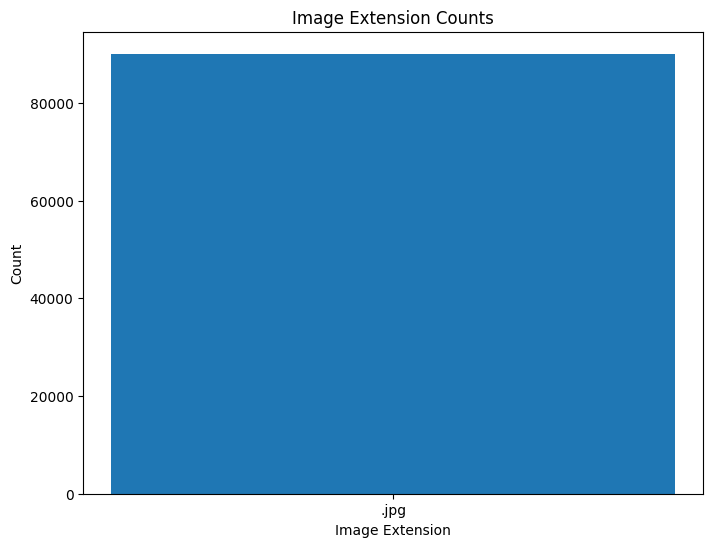

In [13]:
import os
import matplotlib.pyplot as plt

def plot_extension_counts(image_paths_list):
    extension_counts = {}
    
    # Iterate over each image path list
    for image_paths in image_paths_list:
        # Iterate over each image path in the list
        for image_path in image_paths:
            # Extract the file extension
            extension = os.path.splitext(image_path)[1]
            # Increment the count for the extension
            extension_counts[extension] = extension_counts.get(extension, 0) + 1
    
    # Convert extension counts dictionary to lists for plotting
    extensions = list(extension_counts.keys())
    counts = list(extension_counts.values())
    
    # Plot the extension counts
    plt.figure(figsize=(8, 6))
    plt.bar(extensions, counts)
    plt.xlabel('Image Extension')
    plt.ylabel('Count')
    plt.title('Image Extension Counts')
    plt.show()

# Example image paths list


# Plot the extension counts for the image paths list
plot_extension_counts(image_paths_list)



Size counts for List 1:
   Size (width, height)  Count
0           (224, 224)   6537
1           (350, 350)     41

Size counts for List 2:
   Size (width, height)  Count
0           (350, 350)  22053

Size counts for List 3:
   Size (width, height)  Count
0           (350, 350)   7870

Size counts for List 4:
   Size (width, height)  Count
0           (350, 350)  32401

Size counts for List 5:
   Size (width, height)  Count
0           (350, 350)   4080

Size counts for List 6:
   Size (width, height)  Count
0           (350, 350)  17099
1           (500, 446)      1


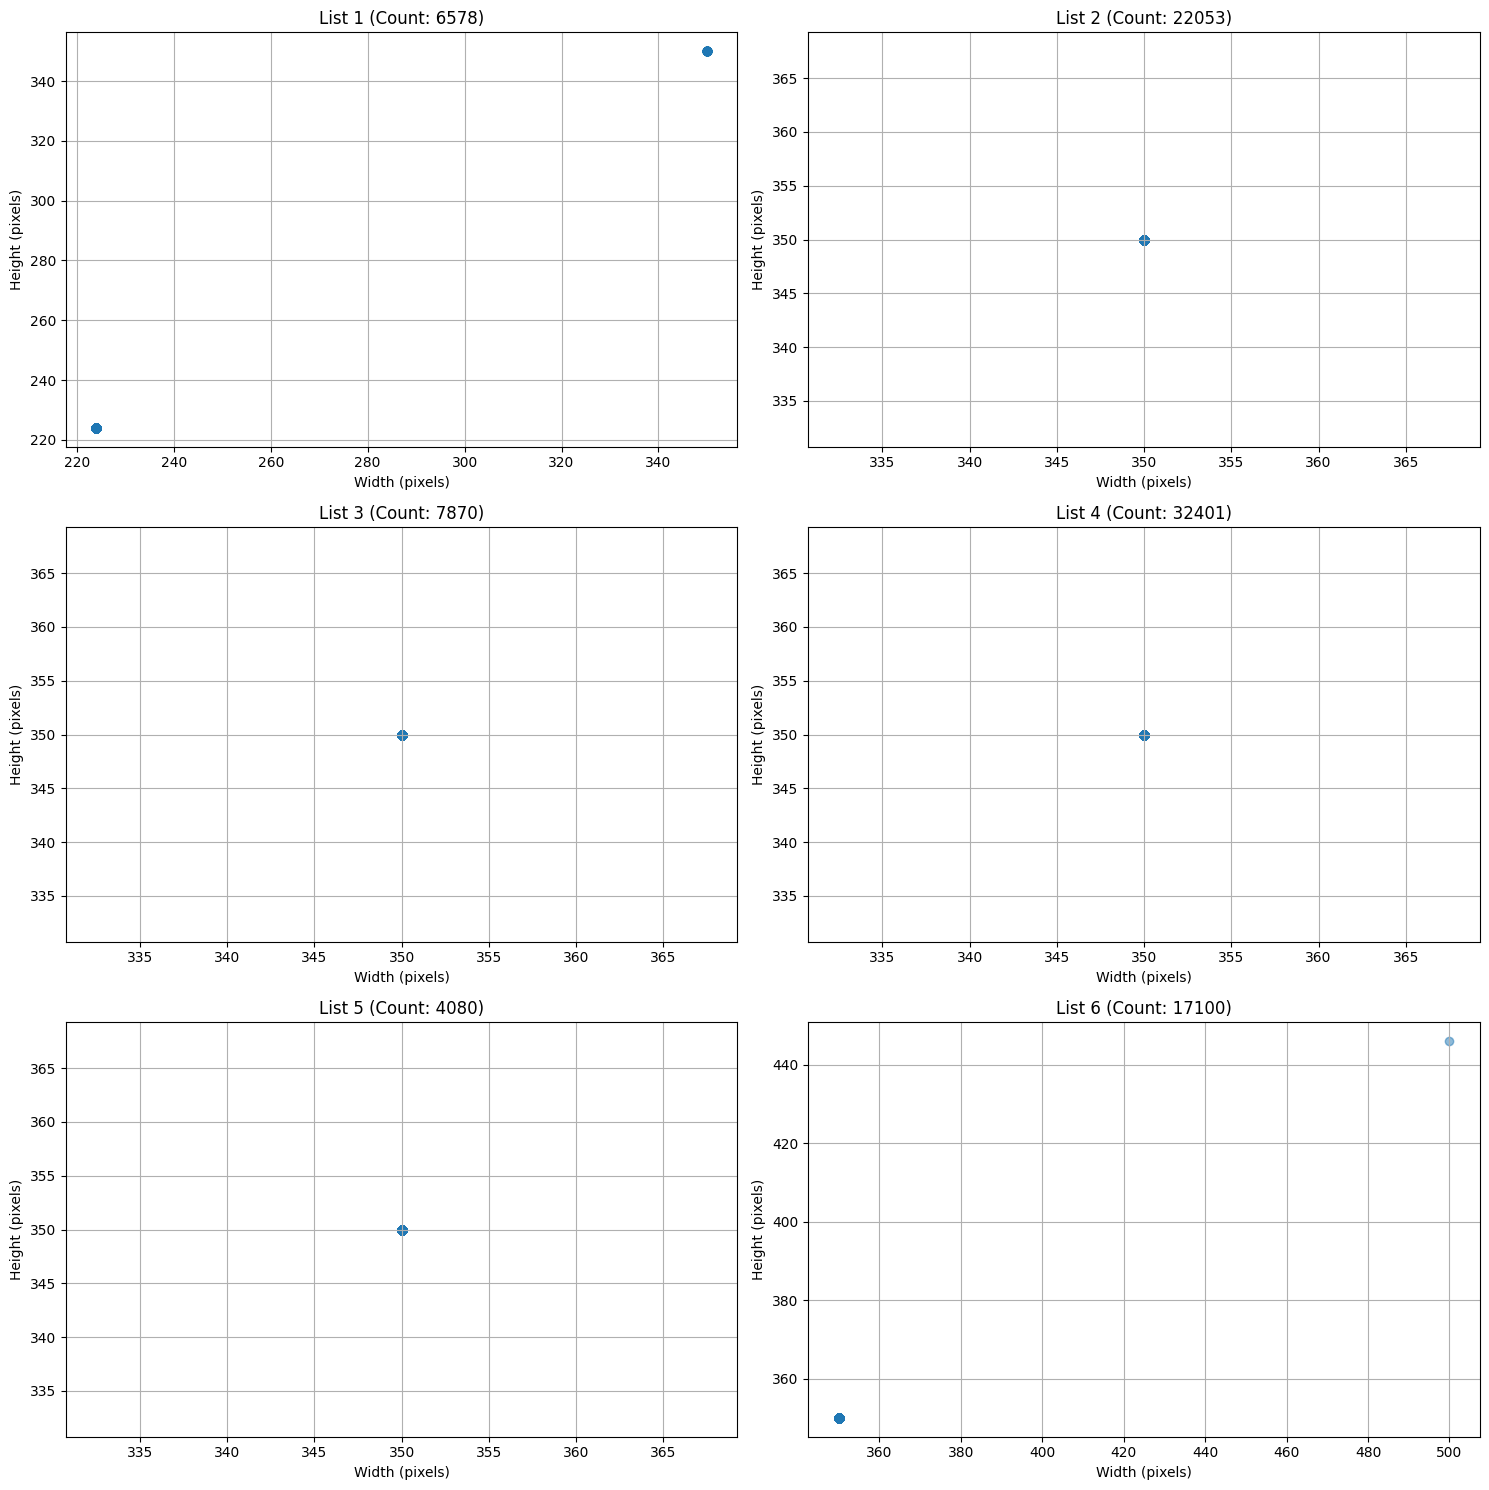

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

def get_image_size(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            return width, height
    except FileNotFoundError:
        print(f"The file at path {image_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

def generate_plot_data_and_counts(image_paths):
    sizes = [get_image_size(image_path) for image_path in image_paths if get_image_size(image_path) is not None]
    size_counts = {}
    if sizes:
        widths = [size[0] for size in sizes]
        heights = [size[1] for size in sizes]
        for size in sizes:
            if size in size_counts:
                size_counts[size] += 1
            else:
                size_counts[size] = 1
        return widths, heights, size_counts
    return [], [], {}

def plot_individual_subplots(image_paths_list):
    num_lists = len(image_paths_list)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = (num_lists + num_cols - 1) // num_cols  # Calculate rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axes = axes.flatten()  # Flatten the 2D array of axes

    for i, image_paths in enumerate(image_paths_list):
        widths, heights, size_counts = generate_plot_data_and_counts(image_paths)
        if widths and heights:
            axes[i].scatter(widths, heights, alpha=0.5)
            axes[i].set_title(f'List {i+1} (Count: {sum(size_counts.values())})')
            axes[i].set_xlabel('Width (pixels)')
            axes[i].set_ylabel('Height (pixels)')
            axes[i].grid(True)

            # Create a DataFrame for the size counts
            size_counts_df = pd.DataFrame(list(size_counts.items()), columns=['Size (width, height)', 'Count'])
            print(f"\nSize counts for List {i+1}:\n", size_counts_df)
        else:
            axes[i].set_visible(False)  # Hide subplot if no valid images

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Plot image sizes from all lists
plot_individual_subplots(image_paths_list)


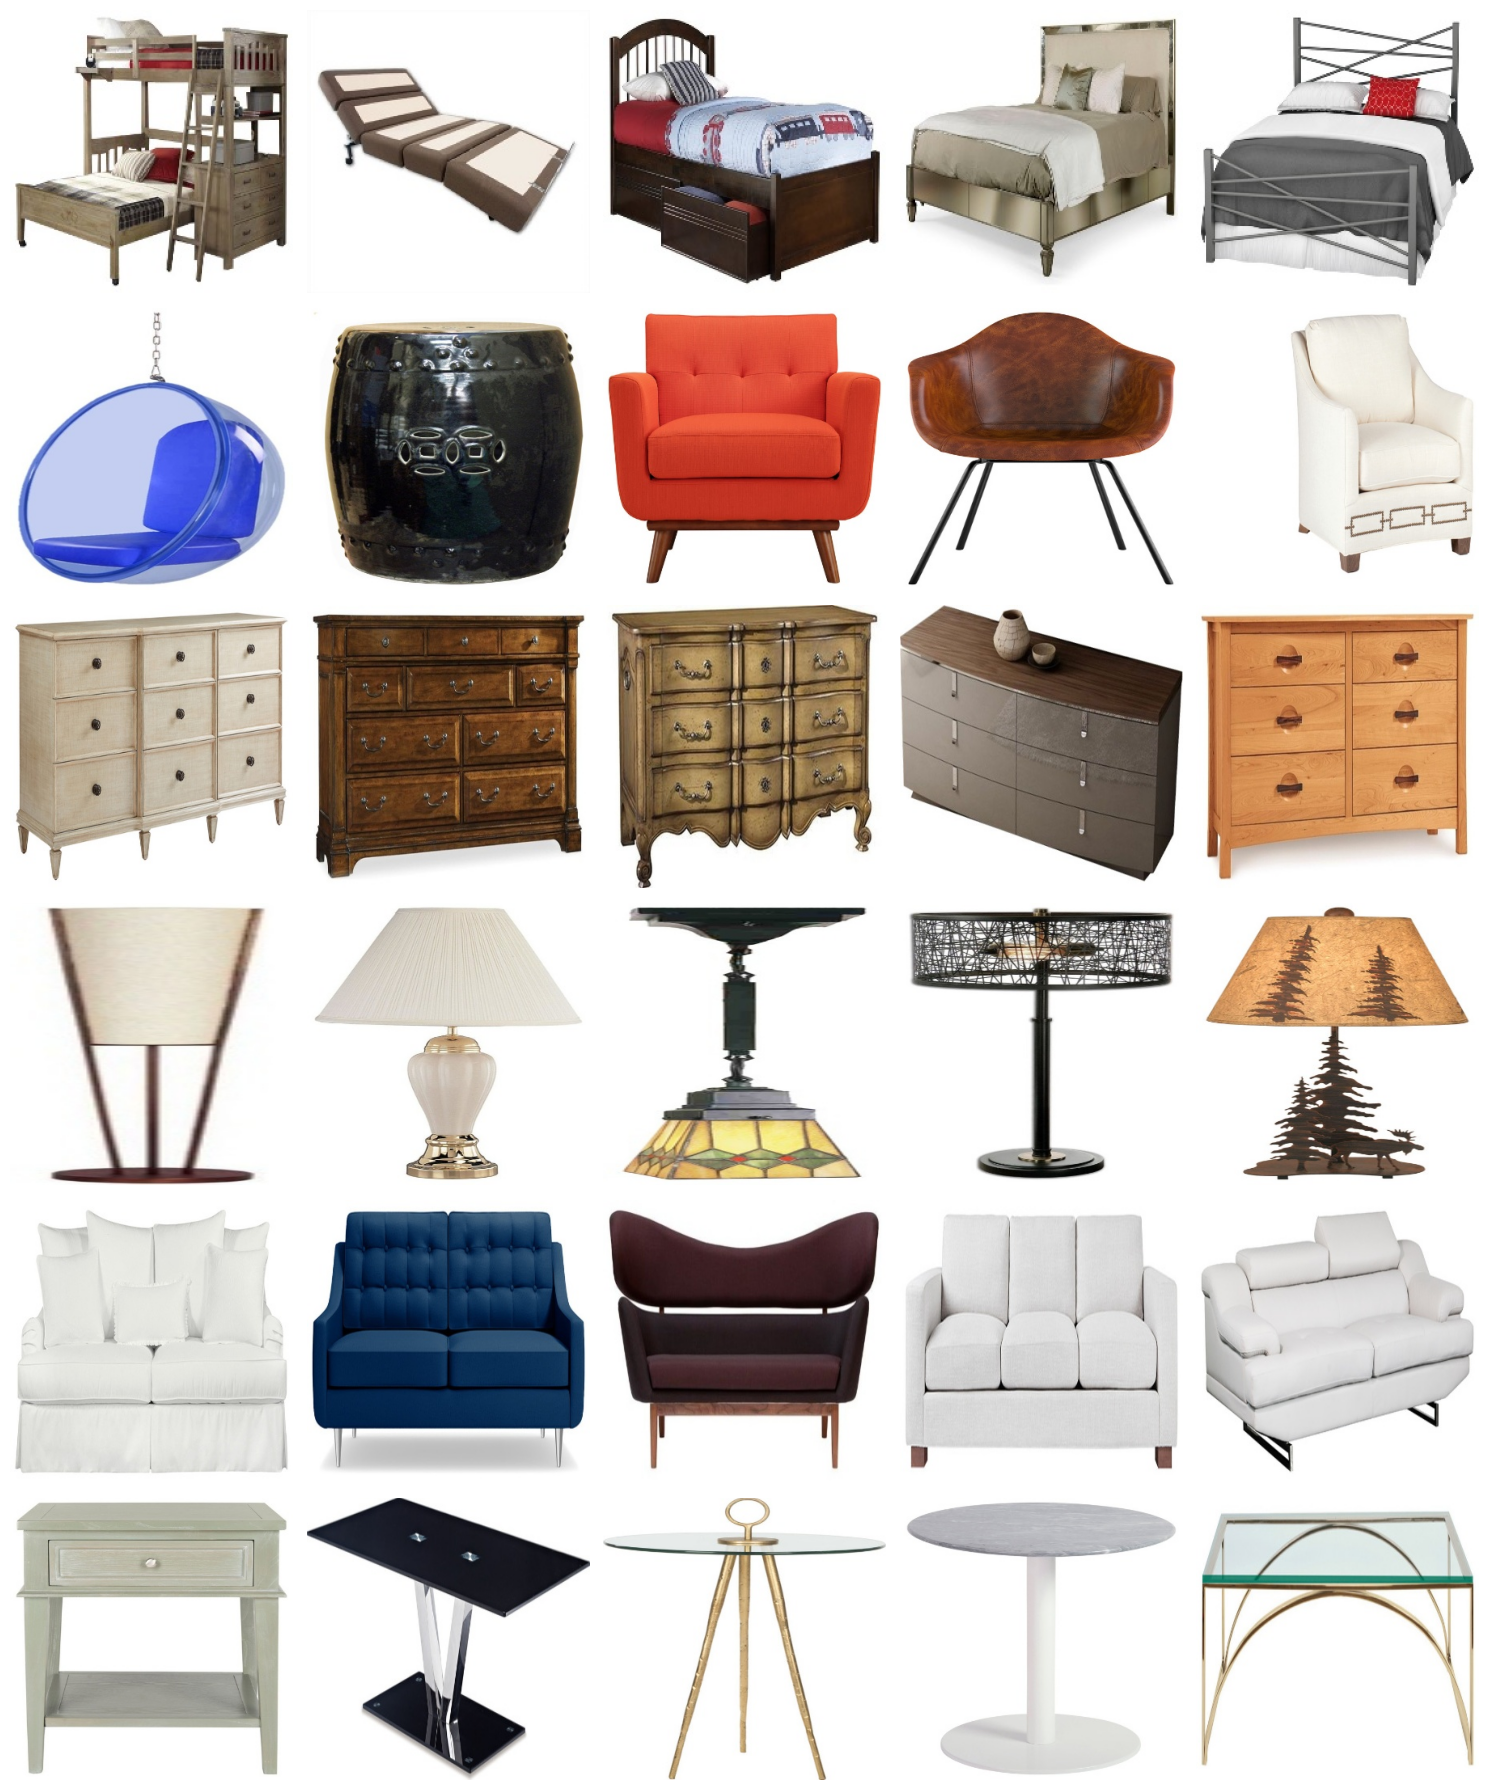

In [15]:
import matplotlib.pyplot as plt
import cv2
import random

def visualize_sample_images(image_paths_list, category_names, samples_per_category=5):
    num_categories = len(image_paths_list)
    
    fig, axes = plt.subplots(num_categories, samples_per_category, figsize=(15, num_categories * 3))
    
    for i, (image_paths, category_name) in enumerate(zip(image_paths_list, category_names)):
        sample_images = random.sample(image_paths, min(samples_per_category, len(image_paths)))
        
        for j, image_path in enumerate(sample_images):
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            axes[i, j].imshow(image)
            axes[i, j].axis('off')
        
        axes[i, 0].set_ylabel(category_name, size='large')

    plt.tight_layout()
    plt.show()


# Visualize sample images
visualize_sample_images(image_paths_list, categories)


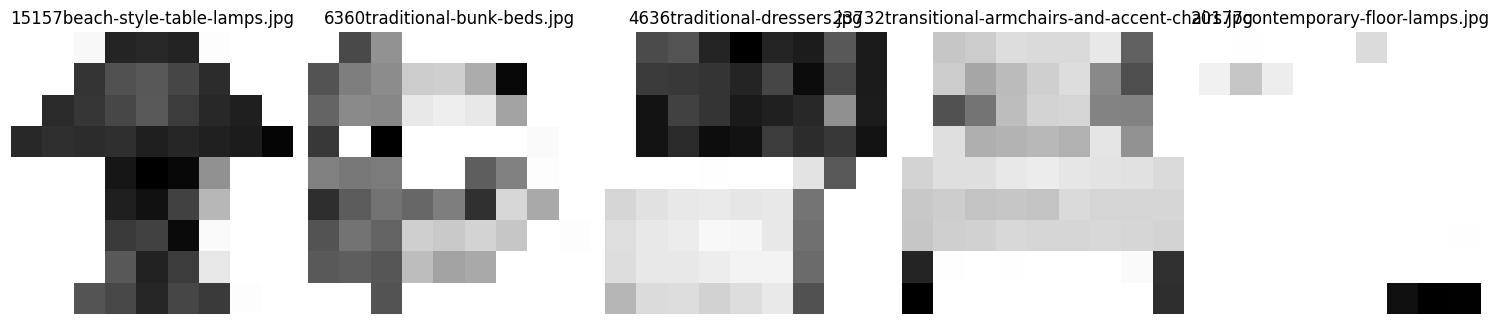

In [22]:
import cv2
import random
from matplotlib import pyplot as plt

def load_convert_and_downscale_images(image_paths, num_samples=5, size=(9, 9)):
    processed_images = []
    sampled_paths = random.sample(image_paths, min(num_samples, len(image_paths)))

    for image_path in sampled_paths:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Failed to read image at path {image_path}")
            continue
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        downscaled_image = cv2.resize(gray_image, size)
        processed_images.append((image_path, downscaled_image))
    return processed_images

def visualize_images(images):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, (image_path, image) in enumerate(images):
        axes[i].imshow(image, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(image_path.split('/')[-1])  # Show file name

    plt.tight_layout()
    plt.show()

# Flatten the list of lists into a single list of image paths
image_paths = [path for sublist in image_paths_list for path in sublist]

# Load, convert to grayscale, and downscale images
processed_images = load_convert_and_downscale_images(image_paths, num_samples=5, size=(9, 9))

# Visualize downscaled grayscale images
visualize_images(processed_images)


## Get the total amount of images in different categories before checking for duplicants

In [12]:
print("Amount of bed: ", len(beds_path))
print("Amount of chair: ", len(chairs_path))
print("Amount of dresser: ", len(dressers_path))
print("Amount of lamp: ", len(lamps_path))
print("Amount of sofa: ", len(sofas_path))
print("Amount of table: ", len(tables_path))
print(
    "Total: ",
    len(beds_path)
    + len(chairs_path)
    + len(dressers_path)
    + len(lamps_path)
    + len(sofas_path)
    + len(tables_path),
)

Amount of bed:  6578
Amount of chair:  22053
Amount of dresser:  7870
Amount of lamp:  32401
Amount of sofa:  4080
Amount of table:  17100
Total:  90082


### Visualization

In [13]:
image_Classes = {
    "Beds": len(beds_path),
    "Chairs": len(chairs_path),
    "Dressers": len(dressers_path),
    "Sofas": len(sofas_path),
    "Lamps": len(lamps_path),
    "Tables": len(tables_path),
}

Text(0, 0.5, 'Amount')

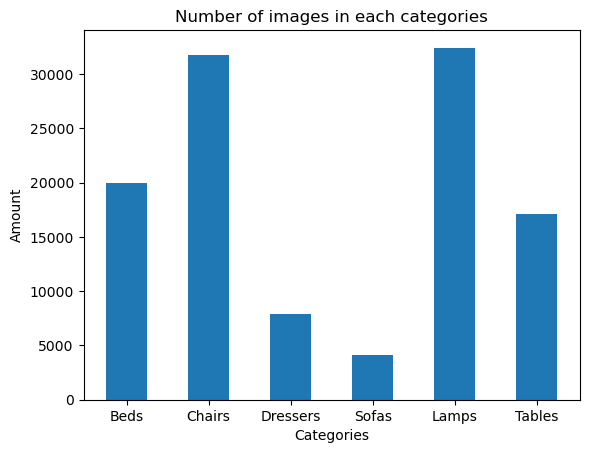

In [19]:
plt.bar(image_Classes.keys(), image_Classes.values(), width=0.5)
plt.title("Number of images in each categories")
plt.xlabel("Categories")
plt.ylabel("Amount")

## Get different amount of image size of each category

### Visualization

#### Visualization of each dataset

Investigate anomaly data in the dataframe

In [ ]:
df_table_dims.describe().T

,count,mean,std,min,25%,50%,75%,max
width,17100.0,350.008772,1.147079,350.0,350.0,350.0,350.0,500.0
height,17100.0,350.005614,0.734130,350.0,350.0,350.0,350.0,446.0


## Conclusion

- The dataset contains 6 categories of items with 90083 items total
- The dataset contains all file with JPEG type
- The dataset contains image mainly in two dimensions: 224x224 and 350x350. However there are one anomaly dimensions in the table category which is: 500x446

# Data Preprocessing

## Data cleaning

Getting length of all path in raw dataset

In [21]:
print(len(beds_path))
print(len(chairs_path))
print(len(dressers_path))
print(len(lamps_path))
print(len(sofas_path))
print(len(tables_path))

19948
31733
7892
32422
4101
17121


Check the size in each categories

In [24]:
image_process.imgSizeList(beds_path)
image_process.imgSizeList(chairs_path)
image_process.imgSizeList(dressers_path)
image_process.imgSizeList(lamps_path)
image_process.imgSizeList(sofas_path)
image_process.imgSizeList(tables_path)

Getting image size: 100%|██████████| 19948/19948 [00:18<00:00, 1053.45it/s]


224x224 pixels:  6537
350x350 pixels:  13411
Other size:  0


Getting image size: 100%|██████████| 31733/31733 [00:48<00:00, 657.28it/s] 


224x224 pixels:  0
350x350 pixels:  31733
Other size:  0


Getting image size: 100%|██████████| 7892/7892 [00:16<00:00, 484.72it/s]


224x224 pixels:  0
350x350 pixels:  7892
Other size:  0


Getting image size: 100%|██████████| 32422/32422 [01:10<00:00, 461.16it/s]


224x224 pixels:  0
350x350 pixels:  32422
Other size:  0


Getting image size: 100%|██████████| 4101/4101 [00:09<00:00, 454.01it/s]


224x224 pixels:  0
350x350 pixels:  4101
Other size:  0


Getting image size: 100%|██████████| 17121/17121 [00:37<00:00, 454.70it/s]

224x224 pixels:  0
350x350 pixels:  17120
Other size:  1


[(350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),
 (350, 350),

As the size in each categories still contains different image sizes of 224x224, 350x350 and one outliers at 500x446.
We will start with resizing all images to 350x350. Here are some reasons:
- The vast majority of the images are already at 350x350. Upscaling the smaller images will introduce minimal distortion compared to downscaling the majority to 224x224.
- Upscaling generally retains more information from the original image than downscaling. While some interpolation artifacts might be introduced, they are less likely to significantly impact model performance compared to the information loss from downscaling.
- The single image with a size of 500x448 is an outlier. which we can either upscale it to match the majority or exclude it from our dataset without significant impact.

### Image resizing

In [25]:
size = (350,350)
save_path = CLEANED_DATASET_DIR
image_process.resize_images(beds_path, size, save_path)
image_process.resize_images(chairs_path, size, save_path)
image_process.resize_images(dressers_path, size, save_path)
image_process.resize_images(lamps_path, size, save_path)
image_process.resize_images(sofas_path, size, save_path)
image_process.resize_images(tables_path, size, save_path)

Resizing images:  26%|██▌       | 5144/19948 [00:24<01:09, 213.28it/s]


KeyboardInterrupt: 

### Getting path from cleaned dataset

In [ ]:
cleaned_dir = CLEANED_DATASET_DIR
cleaned_beds_path = image_process.image_path(cleaned_dir, "beds")
cleaned_chairs_path = image_process.image_path(cleaned_dir, "chairs")
cleaned_dressers_path = image_process.image_path(cleaned_dir, "dressers")
cleaned_lamps_path = image_process.image_path(cleaned_dir, "lamps")
cleaned_sofas_path = image_process.image_path(cleaned_dir, "sofas")
cleaned_tables_path = image_process.image_path(cleaned_dir, "tables")

### Checking for duplicates

In [ ]:
image_process.imgDupchecks(beds_path)
image_process.imgDupchecks(chairs_path)
image_process.imgDupchecks(dressers_path)
image_process.imgDupchecks(lamps_path)
image_process.imgDupchecks(sofas_path)
image_process.imgDupchecks(tables_path)

### Data Augmentation

This is a time-consuming task, be aware that it will take a long time to run

In [ ]:
save_dir = PROCESSED_DATASET_DIR
image_process.augment_images(cleaned_beds_path,save_dir )
image_process.augment_images(cleaned_chairs_path,save_dir)
image_process.augment_images(cleaned_dressers_path,save_dir)
image_process.augment_images(cleaned_lamps_path,save_dir)
image_process.augment_images(cleaned_sofas_path,save_dir)
image_process.augment_images(cleaned_tables_path,save_dir)

After all of the above step, the data would ready to be input to the model, the data which can be use will be available in the .data/dataset/processed 